### 목표
- 머신러닝의 과정에 대해서 정리해보자
- 실제 데이터를 통해서 고객에게 서비스 할 제품에 대해 근거가 될만한 자료를 생성해보자

#### 1. 문제 정의
- 모델을 구축하는 목표 설정
- 모델 선택 내용 정의
- 분류 vs 회귀 정의
- 어떤 데이터가 필요할까?
-------
> **시나리오** 🌏 (서비스기획자)
 
```
- A업체는 가정 내 온습도를 측정하는 기존 제품을 통해 고객에게 서비스를 제공해 왔음
- 한때 업계 선두를 유지했으나, 다양한 경쟁사의 등장으로 인해 최근 판매량이 감소하고 있는 상황임
- 단순히 제품 판매에 의존하는 비즈니스 모델로는 지속적인 성장이 어렵다고 판단하여, 새로운 고객 가치를 창출할 수 있는 제품 개발을 추진하게 됨
- 온습도 센서로부터 수집한 데이터를 기반으로 AI 제습기를 개발하여, 고객의 편의성을 높이고 경쟁사 대비 우위를 선점하려고 함
```

In [3]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

#### 2. 데이터 수집
- 데이터 정리
- 웹 크롤링
- API
- csv 파일
- DB
- 설문조사

In [5]:
# 출처 : kaggle
data  = pd.read_csv('./data/온습도 관측 데이터.csv')
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1546 entries, 0 to 1545
Data columns (total 4 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   T            1546 non-null   float64
 1   RH           1546 non-null   float64
 2   AH           1546 non-null   float64
 3   Comfortable  1546 non-null   int64  
dtypes: float64(3), int64(1)
memory usage: 48.4 KB


In [6]:
data.head()

,T,RH,AH,Comfortable
0,21.025,30.625000,0.753814,0
1,9.250,37.550000,0.439072,1
2,35.825,28.724999,1.662621,0
3,15.975,35.824999,0.645597,1
4,12.200,69.575001,0.985989,0


- 행 1546, 열 4
- 결측치 x
- 데이터 타입 : 수치형
- Comfortable : 분류

> **데이터 설명**
 
* 3개의 센서 데이터가 수집됨 (원활한 실습을 위해 라벨은 미리 달아두었음)
* 데이터 명세
 
| Column Name | 컬럼명 | 설명 |
|-------------|--------|------|
| T | 온도 | 주변 환경의 온도 (섭씨) |
| RH | 상대습도 | 공기 중 습도의 비율 (%) |
| AH | 절대습도 | 공기 중 실제 수증기량 |
| Comfortable | 쾌적 여부 | 환경이 쾌적한지 나타내는 이진값 - 0(불쾌), 1(상쾌) |

#### 3. 데이터 전처리(preprocessing)
- 결측치 제거 및 대체
- 이상치 제거 및 대체
- 변수(컬럼, 특성, feature) 처리 : 특성추가, 삭제, 선택, 스케일링(단위 조정), 인코딩
------

#### 4. EDA(탐색적 데이터 분석)
- 데이터의 기술통계량(최대,최소,사분위수,평균,중앙 등), 시각화 등을 통한 다양한 각도에서 데이터를 관찰하는 단계
- 데이터 전처리를 하게되는 근거로 삼을수 있음

In [11]:
# 기술통계량
data.describe().T

,count,mean,std,min,25%,50%,75%,max
T,1546.0,18.702808,8.787124,-1.900000,11.825000,19.225000,25.168750,44.600000
RH,1546.0,43.917987,14.464104,9.225000,36.150000,38.724999,51.468750,88.725000
AH,1546.0,0.977192,0.423748,0.198757,0.639129,0.959642,1.289465,2.139496
Comfortable,1546.0,0.482536,0.499857,0.000000,0.000000,0.000000,1.000000,1.000000


In [12]:
# 불쾌/상쾌를 판단하기 위한 가장 중요한 특성(T,RH,AH)은 무엇일까?
# -- 여러 특성간의 관계를 파악해보자!
# corr : 상관계수 값을 통해서 특성간의 연관성을 파악하자(상관관계)
# 특성간의 방향성을 파악해서 비례, 반비례, 의미x
# -1 ~ 1 범위로 수치 표현
# 0 의미가 없음
data.corr()['Comfortable']

T              0.080162
RH            -0.431584
AH            -0.113466
Comfortable    1.000000
Name: Comfortable, dtype: float64

#### 상관계수 해석
 
```
|r| = 절대값  
 
· 0.0 <= |r| < 0.2 : 상관관계가 없다. = 선형의 관계가 없다.  
 
· 0.2 <= |r| < 0.4 : 약한 상관관계가 있다.  
 
· 0.4 <= |r| < 0.6 : 보통의 상관관계가 있다.  
 
· 0.6 <= |r| < 0.8 : 강한 (높은) 상관관계가 있다.  
 
· 0.8 <= |r| <= 1.0 : 매우 강한 (매우 높은) 상관관계가 있다.
```

- RH : 상대습도가 상대적으로 상관관계가 높음! (약한 상관관계)

In [15]:
# 데이터 분리 진행하기
# 문제, 답 분리
# 문제 : 특성, 독립변수, 설명변수, feature, X
# 답 : label, 레이블, 라벨, 종속변수, 반응변수, y
# * 왜 X 대문자인가? 문제데이터 컬럼은 여러개(차원 개수 많음 > 대문자로 표현)
data.head()

,T,RH,AH,Comfortable
0,21.025,30.625000,0.753814,0
1,9.250,37.550000,0.439072,1
2,35.825,28.724999,1.662621,0
3,15.975,35.824999,0.645597,1
4,12.200,69.575001,0.985989,0


In [16]:
X = data.iloc[:,:3]   # data.drop('Comfortable', axis=1)
y = data['Comfortable']

print(X.shape, y.shape)

(1546, 3) (1546,)


In [17]:
# train, test 분리
# 행분리
# -- 직접 비율에 따른 개수를 파악해서 분리해보자!
X.shape[0]*0.7   # 1082개 train, 나머지 test

1082.1999999999998

In [18]:
X_train = X[:1082]
X_test = X[1082:]
y_tain = y[:1082]
y_test = y[1082:]

X_train.shape, X_test.shape, y_tain.shape, y_test.shape

((1082, 3), (464, 3), (1082,), (464,))

- 만약, 0은 0대로, 1은 1대로 정리된 데이터라면 위 방식이 괜찮을까?
- -- 랜덤하게 섞는 기능 + 비율에 따라 분리 :  sklearn 패키지 내부에 있는 train_test_split()

In [20]:
# 데이터 분할하는 도구 사용하기
from sklearn.model_selection import train_test_split

In [21]:
X_train, X_test, y_train, y_test = train_test_split(X,y, test_size=0.3, random_state=7) # 7규칙으로 랜덤 섞어줌

print('훈련용', X_train.shape, y_train.shape)
print('테스트용', X_test.shape, y_test.shape)
# 랜덤샘플링 : 랜덤하게 행을 섞어서 분리해줌! 데이터의 다양성을 표현해주기 위해서(0,1 제대로 학습할 수 잇게)

훈련용 (1082, 3) (1082,)
테스트용 (464, 3) (464,)


#### 5. 머신러닝 모델 선택
- 이진분류
- 분류 모델 선택
- 종류는 다양하지만, knn모델을 사용해보자!
- 하이퍼 파라미터를 조정해보자(튜닝)

In [23]:
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import accuracy_score

In [24]:
knn_model = KNeighborsClassifier(n_neighbors=3)
knn_model.fit(X_train, y_train)
pred = knn_model.predict(X_test)
accuracy_score(y_test, pred)

0.9870689655172413

In [25]:
knn_model = KNeighborsClassifier(n_neighbors=5)
knn_model.fit(X_train, y_train)
pred = knn_model.predict(X_test)
accuracy_score(y_test, pred)

0.9762931034482759

- n_neighbors 5보다 3이 더 정확도가 높다

In [27]:
knn_model = KNeighborsClassifier(n_neighbors=7)
knn_model.fit(X_train, y_train)
pred = knn_model.predict(X_test)
accuracy_score(y_test, pred)

0.9698275862068966

In [28]:
knn_model = KNeighborsClassifier(n_neighbors=4)
knn_model.fit(X_train, y_train)
pred = knn_model.predict(X_test)
accuracy_score(y_test, pred)
# 이웃의 수를 다수결 판단 알고리즘 : 2:2 / 4:4 *거리값이 가까운 데이터의 중요도를 높여서 예측 결과를 진단
# 대체적으로 n_neighbors은 홀수 채용

0.9892241379310345

- test 1번만 진행했기 때문에, k가 4로 설정한 것이 모델의 성능이 최고로 높다라고 단정짓기에는 어려움
- 여러번 판단해볼 필요가 있고 train의 성능도 좋고 test성능도 좋은 형태의 모델을 찾는 노력 필요

- 일반화 (Generalization): 훈련 데이터뿐만 아니라 새로운 데이터에도 잘 작동하는 능력.
- 과대적합 (Overfitting): 훈련 데이터에 너무 맞춰져서 새로운 데이터에 대한 성능이 나쁜 상태.
- 과소적합 (Underfitting): 모델이 너무 단순하여 훈련 데이터와 새로운 데이터 모두에서 성능이 낮은 상태.

#### 모델의 목표는 일반화를 잘 하도록 하여, 과대적합과 과소적합을 피하는 것

In [31]:
# 8. 모델 활용(서비스화)
# - 웹, 앱 서비스화
# - 데이터 분석에 대한 근거를 수립할 때 활용(보고서)

## Decision Tree(dt) : 의사결정 나무
- 스무고개 하듯이 질문(조건)을 통해 데이터를 분류하는 모델
- 불순도가 낮아지는 방향으로 질문을 선정 : 질문은 모델의 규칙

In [51]:
from sklearn.tree import DecisionTreeClassifier

In [55]:
# max_depth=None -> 깊이 제어되지 않음 -> 끝까지 가지 뻗어나가면서 모델이 규칙을 세운다!
clf = DecisionTreeClassifier(max_depth=5,random_state=21)
clf.fit(X_train, y_train)
pred = clf.predict(X_test)
accuracy_score(pred, y_test)

1.0

#### ACC 확인 다른 방법

In [72]:
clf = DecisionTreeClassifier(max_depth=7,random_state=21)
clf.fit(X_train, y_train)
# X: 입력특성, feature, 문제, 독립변수, 설명변수
# y : 답, label, 레이블, 라벨, 타겟, 종속변수, 반응변수
clf.score(X_test, y_test)

train_score = clf.score(X_train, y_train)
test_score = clf.score(X_test, y_test)
print('train 정확도 : ',train_score)
print('test 정확도 : ',test_score)

train 정확도 :  1.0
test 정확도 :  1.0


- 예측 진행한 상황이라면 accuarcy_score 사용해도 무방 pred
- 예측 말고 평가만 진행하고 싶을 때 : 모델.socre(문제, 답)
  <br><br>
- test 1번 진행했을 때, train 100%, test 100% -> 일반화 모델!
- test 데이터를 여러번 만들어내서 정확도를 확인하는 검증 과정이 필요!

In [76]:
# 검증 사용 도구 : 교차 검증 도구
from sklearn.model_selection import cross_val_score
# cross : 교차 (여러번)
# val : 검증 (validation)
# socre : 성능점수 *기본값 accuracy

# clf 성능 판단 : 해당 모델은 일반화된 모델인가?
# 여러번 검증(test)을 해도 성능이 좋은가? -> ACC
# estiamtor : 예측도구(모델이름)
cross_val_score(clf, X_train, y_train, cv=3)

array([1.        , 1.        , 0.99722222])

- cv : 검증 -> 위 코드는 검증 3번
- 검증을 했는데 1., 1., 0.99로
- 해당모델은 입력특성에 대한 일반화된 모델이다!
#### 모델 객체 생성 > 교차검증 > fit > test score
- 이 순서를 지키지 않아도 괜찮

#### 일반화, 과대적합, 과소적합
- 일반화(generalization) : 훈련 세트로 학습한 모델이 테스트 세트에 대해 정확이 예측하도록 하는 것
- 과대적합(overfitting) : 머신러닝 모델을 학습할 때, 학습데이터 셋에 지나치게 최적화하여 발생하는 현상, 테스트셋에 대한 성능은 비교적 떨어짐
- 과소적합(underfitting) : 머신러닝 모델이 충분히 복잡하지 않아(규칙이 생성되지 않아, 최적화가 제대로 되지 않아) 학습 데이터의 구조/패턴을 정확히 반영하지 못한 상태, 훈련셋&테스트셋 성능 떨어짐
<br><br>
- 일반화를 위한 노력
- 1. 모델 측면: 하이퍼 파라미터 개선(튜닝)
  2. 데이터 측면: 데이터 추가, 정제(전처리) 등 데이터 개선

In [86]:
# 모델의 복잡도 확인해보자! tree모델 스무고개를 진행한 현황을 출력 기능
from sklearn.tree import plot_tree

In [88]:
# 온도, 상대습도, 절대습도 등 입력 특성에 따라서 분기할 질문을 선택!
# 해당 과정을 반복하면서 0,1나누는 규칙을 생성함
X_train.columns

Index(['T', 'RH', 'AH'], dtype='object')

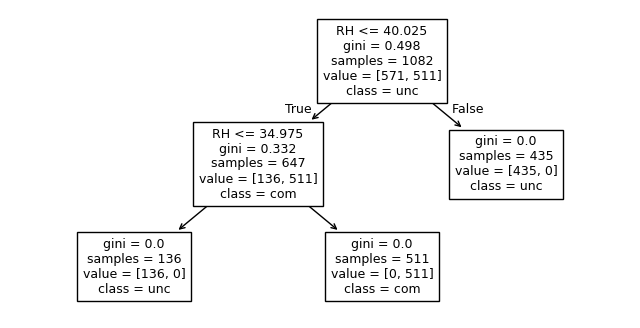

In [100]:
plt.figure(figsize=(8,4))
plot_tree(clf, feature_names=X_train.columns, class_names=['unc','com'], filled=False, fontsize=9) #filled : 노드들의 색상채우기 부부
plt.show()

- 상대습도가 굉장히 중요한 역할로 활용됨
- 모델 자체적으로 상대습도 컬럼(특성)의 중요도를 판단해서 질문을 던지는 기준으로 활용!
- *(특성)의 중요도를 판단하는 모델 >> dt 모델
- *특성의 중요도는 모델 내부에서 무엇에 의해 판단되었는가? -> 지니불순도 공식(지니계수)

#### 만약 RH(상대습도)가 없었다면?
- 데이터가 수치데이터 되어있어서 전처리(정제) 할 필요 없음
- T, AH(상대습도) 두개반 활용해서 모델링 해보자!
- 모델의 성능이 어떻게 달라지는지 확인해보고, 과(대,소)적합 여부를 논의
- 다른 특성, 하이퍼 파라미터를 저정하며 모델 성능을 점진적으로 개선해보는 과정을 경험해보자
- sklearn의 다양한 모델 클래스를 활용하여 직접 실습하면서 모델의 장단점을 이해해보자

In [105]:
data.head()

,T,RH,AH,Comfortable
0,21.025,30.625000,0.753814,0
1,9.250,37.550000,0.439072,1
2,35.825,28.724999,1.662621,0
3,15.975,35.824999,0.645597,1
4,12.200,69.575001,0.985989,0


In [129]:
# 데이터 분리(상대습도 컬럼 제외하고 문제, 답을 구성해보기)
X = data.drop(['RH','Comfortable'], axis=1)
y = data['Comfortable']

In [133]:
X_train, X_test, y_train, y_tast = train_test_split(X, y, train_size=0.7, random_state=7)
print('훈련용', X_train.shape, y_train.shape)
print('테스트용', X_test.shape, y_test.shape)

훈련용 (1082, 2) (1082,)
테스트용 (464, 2) (464,)


train 정확도 :  1.0
test 정확도 :  1.0


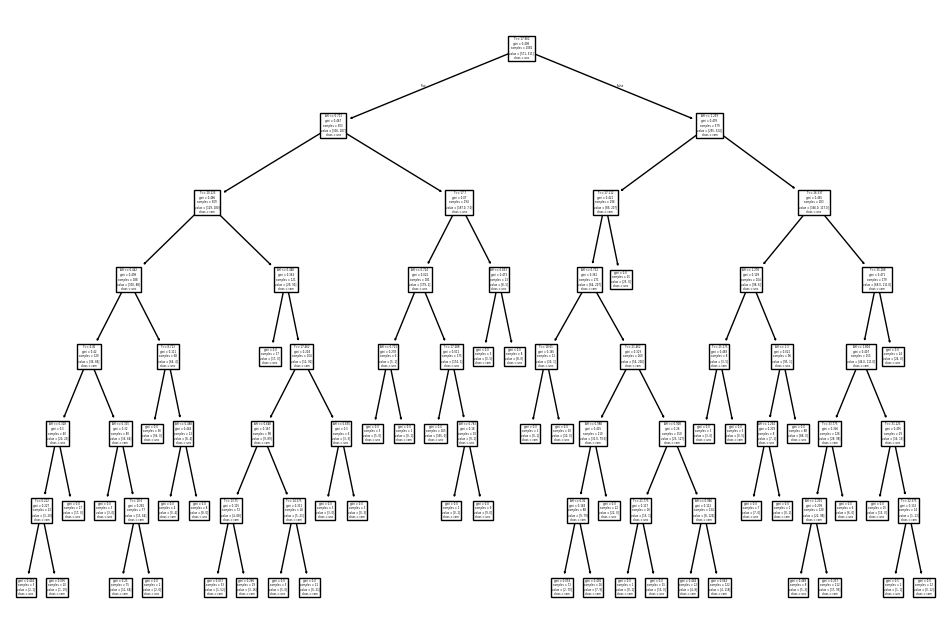

In [145]:
tree_model2 = DecisionTreeClassifier(max_depth=7,random_state=7)
tree_model2.fit(X_train, y_train)
train_acc = tree_model2.score(X_train,y_train)
test_acc = tree_model2.score(X_test, y_test)
print('train 정확도 : ',train_score)
print('test 정확도 : ',test_score)

plt.figure(figsize=(12,8))
plot_tree(tree_model2, feature_names=X_train.columns, class_names=['unc','com'], filled=False) #filled : 노드들의 색상채우기 부부
plt.show()

train 정확도 :  1.0
test 정확도 :  1.0


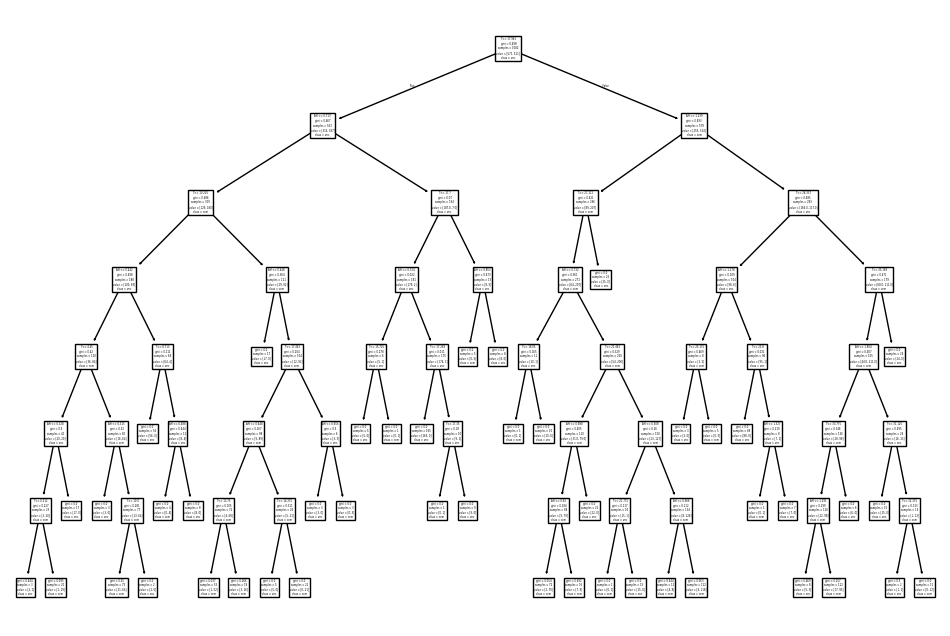

In [151]:
# 모델의 깊이를 제어해보자
# 모델 생성 dt
tree_model3 = DecisionTreeClassifier(max_depth=7)
tree_model3.fit(X_train, y_train)
train_acc = tree_model3.score(X_train,y_train)
test_acc = tree_model3.score(X_test, y_test)
print('train 정확도 : ',train_score)
print('test 정확도 : ',test_score)

plt.figure(figsize=(12,8))
gr1 = plot_tree(tree_model3, feature_names=X_train.columns, class_names=['unc','com'], filled=False) #filled : 노드들의 색상채우기 부부
plt.show()

In [155]:
gr1

[Text(0.5358606557377049, 0.9375, 'T <= 17.962\ngini = 0.498\nsamples = 1082\nvalue = [571, 511]\nclass = unc'),
 Text(0.3360655737704918, 0.8125, 'AH <= 0.713\ngini = 0.467\nsamples = 503\nvalue = [316, 187]\nclass = unc'),
 Text(0.4359631147540983, 0.875, 'True  '),
 Text(0.20491803278688525, 0.6875, 'T <= 10.225\ngini = 0.486\nsamples = 309\nvalue = [129, 180]\nclass = com'),
 Text(0.12295081967213115, 0.5625, 'AH <= 0.442\ngini = 0.498\nsamples = 188\nvalue = [100, 88]\nclass = unc'),
 Text(0.08196721311475409, 0.4375, 'T <= 4.45\ngini = 0.42\nsamples = 120\nvalue = [36, 84]\nclass = com'),
 Text(0.04918032786885246, 0.3125, 'AH <= 0.328\ngini = 0.5\nsamples = 40\nvalue = [20, 20]\nclass = unc'),
 Text(0.03278688524590164, 0.1875, 'T <= 0.212\ngini = 0.227\nsamples = 23\nvalue = [3, 20]\nclass = com'),
 Text(0.01639344262295082, 0.0625, 'gini = 0.444\nsamples = 3\nvalue = [2, 1]\nclass = unc'),
 Text(0.04918032786885246, 0.0625, 'gini = 0.095\nsamples = 20\nvalue = [1, 19]\nclass =

In [ ]:
# 머신러닝 추구미) 일반화된 모델! train, test 성능의 차가 최소가 되도록 함, 
# 훈련셋의 성능은 조금은 떨어지더라도 test 성능이 최대가 되는 부분을 찾는 것

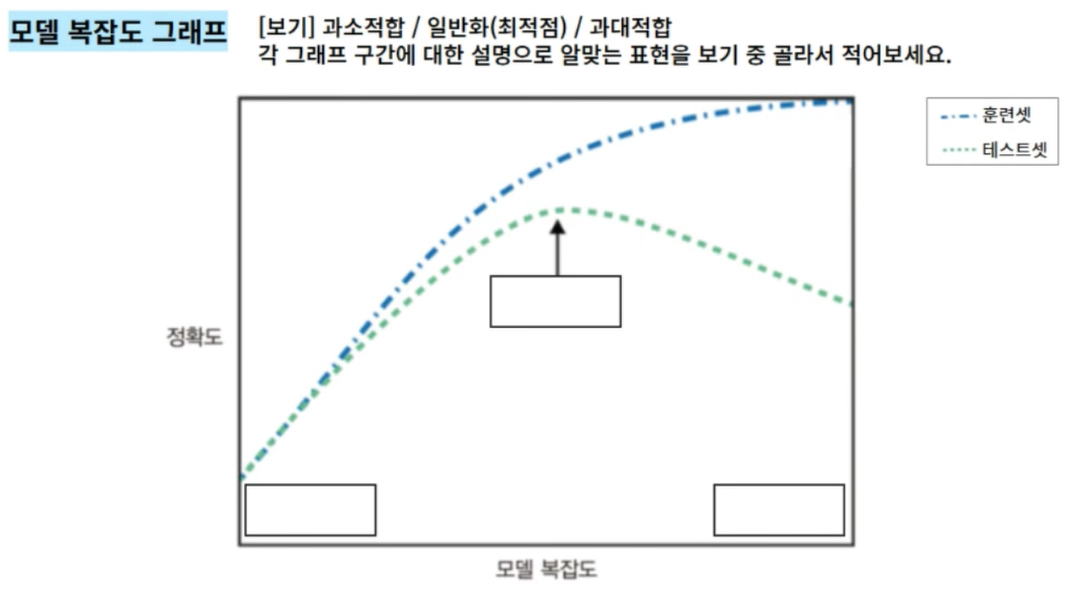

In [ ]:
# 1과소, 2일반화, 3과대

# 훈련셋 성능이 조금은 떨어지더라도, 테스트의 성능이 높은 지점 -> 일반화(최적점)

### 실습 RH(상대습도)를 제외한 데이터셋에 최적화된 모델은?
- 팀활동, 팀마다 다른 분류 모델을 선정하여 데이터에 최적화된 성능이 일반화된 모델을 만들어보자
- 어떤 팀의 모델의 정확도 성능이 제일 높을지 test 점수를 비교해보자
- 하이퍼 파라미터나 모델 알고리즘을 변경해가면서 적용해보자
- 1. 모델 클래스 import
  2. 모델 객체 생성(초기화), 하이퍼파라미터 튜닝(개선)
  3. 학습
  4. 평가 -> 정확도 확인

In [163]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1546 entries, 0 to 1545
Data columns (total 4 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   T            1546 non-null   float64
 1   RH           1546 non-null   float64
 2   AH           1546 non-null   float64
 3   Comfortable  1546 non-null   int64  
dtypes: float64(3), int64(1)
memory usage: 48.4 KB


In [ ]:
# Logistic Regression, RandomForest, SVM(Support Vector Machine), Adaboost, GBM(Bradient Boost Machine)

In [169]:
from sklearn.ensemble import GradientBoostingClassifier
import time
import warnings
warnings.filterwarnings('ignore')

In [175]:
X_train, X_test, y_train, y_test = train_test_split(X,y, train_size=0.7, random_state=7)
st_time = time.time()

gb_clf = GradientBoostingClassifier(n_estimators=5,random_state=7)
gb_clf.fit(X_train, y_train)
train_score = gb_clf.score(X_train, y_train)
test_score = gb_clf.score(X_test, y_test)
print(train_score, test_score)
print('time : ', time.time()-st_time)

0.8160813308687616 0.8017241379310345
time :  0.038599252700805664


In [189]:
for i in range(1,15,2):
    print('n_estimators = ',i)
    gb_clf = GradientBoostingClassifier(n_estimators=i,random_state=7)
    gb_clf.fit(X_train, y_train)
    train_score = gb_clf.score(X_train, y_train)
    test_score = gb_clf.score(X_test, y_test)
    print(train_score, test_score)
    print('time : ', time.time()-st_time)

n_estimators =  1
0.7181146025878004 0.6637931034482759
time :  128.9783103466034
n_estimators =  3
0.8142329020332717 0.7823275862068966
time :  129.0043122768402
n_estimators =  5
0.8160813308687616 0.8017241379310345
time :  129.02791261672974
n_estimators =  7
0.8207024029574861 0.8103448275862069
time :  129.06051087379456
n_estimators =  9
0.8706099815157117 0.8556034482758621
time :  129.1042251586914
n_estimators =  11
0.8752310536044362 0.8599137931034483
time :  129.14865851402283
n_estimators =  13
0.8632162661737524 0.8448275862068966
time :  129.1957082748413


- n_estimators =  11 일 때, acc 비교적 높음

In [202]:
for i in range(1,15,2):
    print('n_estimators = ',i)
    gb_clf = GradientBoostingClassifier(max_depth=5,n_estimators=i,random_state=7)
    gb_clf.fit(X_train, y_train)
    train_score = gb_clf.score(X_train, y_train)
    test_score = gb_clf.score(X_test, y_test)
    print(round(train_score,4), round(test_score,4), '//train-test:',round(train_score - test_score,4))
    print('time : ', time.time()-st_time)

n_estimators =  1
0.8179 0.7953 //train-test: 0.0227
time :  379.7523684501648
n_estimators =  3
0.8678 0.8405 //train-test: 0.0273
time :  379.7835168838501
n_estimators =  5
0.8826 0.8513 //train-test: 0.0313
time :  379.8276960849762
n_estimators =  7
0.8956 0.8642 //train-test: 0.0313
time :  379.875342130661
n_estimators =  9
0.915 0.875 //train-test: 0.04
time :  379.9317286014557
n_estimators =  11
0.9214 0.8922 //train-test: 0.0292
time :  380.01272654533386
n_estimators =  13
0.9242 0.9052 //train-test: 0.019
time :  380.0930333137512


- n_estimators =  13 일때, acc높고 train-test socre 차가 적지만 time이 높게 걸린다

In [204]:
for i in range(15,25,2):
    print('n_estimators = ',i)
    gb_clf = GradientBoostingClassifier(max_depth=5,n_estimators=i,random_state=7)
    gb_clf.fit(X_train, y_train)
    train_score = gb_clf.score(X_train, y_train)
    test_score = gb_clf.score(X_test, y_test)
    print(round(train_score,4), round(test_score,4), '//train-test:',round(train_score - test_score,4))
    print('time : ', time.time()-st_time)
    print()

n_estimators =  15
0.9335 0.9073 //train-test: 0.0261
time :  449.95998644828796

n_estimators =  17
0.9362 0.9224 //train-test: 0.0138
time :  450.06122493743896

n_estimators =  19
0.9362 0.9138 //train-test: 0.0224
time :  450.1840715408325

n_estimators =  21
0.9427 0.9181 //train-test: 0.0246
time :  450.30710530281067

n_estimators =  23
0.9538 0.9224 //train-test: 0.0314
time :  450.4424707889557



In [ ]:
n_estimators =  17
0.9362 0.9224 //train-test: 0.0138

n_estimators =  23
0.9538 0.9224 //train-test: 0.0314

In [210]:
for i in range(15,25,2):
    print('n_estimators = ',i)
    gb_clf = GradientBoostingClassifier(max_depth=5,n_estimators=i,min_samples_leaf=5,random_state=7)
    gb_clf.fit(X_train, y_train)
    train_score = gb_clf.score(X_train, y_train)
    test_score = gb_clf.score(X_test, y_test)
    print(round(train_score,4), round(test_score,4), '//train-test:',round(train_score - test_score,4))
    print('time : ', time.time()-st_time)
    print()

n_estimators =  15
0.927 0.9073 //train-test: 0.0197
time :  766.4867053031921

n_estimators =  17
0.9372 0.9138 //train-test: 0.0234
time :  766.5861876010895

n_estimators =  19
0.9436 0.9203 //train-test: 0.0234
time :  766.6977121829987

n_estimators =  21
0.9492 0.9224 //train-test: 0.0268
time :  766.8136451244354

n_estimators =  23
0.9547 0.9246 //train-test: 0.0301
time :  766.9430408477783



In [ ]:
n_estimators =  23
max_depth=5,n_estimators=23,min_samples_leaf=5
0.9547 0.9246 //train-test: 0.0301

In [212]:
for i in range(15,25,2):
    print('n_estimators = ',i)
    gb_clf = GradientBoostingClassifier(max_depth=5,n_estimators=i,min_samples_leaf=7,random_state=7)
    gb_clf.fit(X_train, y_train)
    train_score = gb_clf.score(X_train, y_train)
    test_score = gb_clf.score(X_test, y_test)
    print(round(train_score,4), round(test_score,4), '//train-test:',round(train_score - test_score,4))
    print('time : ', time.time()-st_time)
    print()

n_estimators =  15
0.9288 0.903 //train-test: 0.0258
time :  827.8634009361267

n_estimators =  17
0.9436 0.9181 //train-test: 0.0255
time :  827.9535822868347

n_estimators =  19
0.9455 0.9224 //train-test: 0.0231
time :  828.0750796794891

n_estimators =  21
0.9473 0.9246 //train-test: 0.0228
time :  828.188004732132

n_estimators =  23
0.9492 0.9267 //train-test: 0.0224
time :  828.3096604347229



In [222]:
# max_depth 조절

for i in range(5,20,2):
    print('max_depth = ',i)
    gb_clf = GradientBoostingClassifier(max_depth=i,n_estimators=23,min_samples_leaf=5,random_state=7)
    gb_clf.fit(X_train, y_train)
    train_score = gb_clf.score(X_train, y_train)
    test_score = gb_clf.score(X_test, y_test)
    print(round(train_score,4), round(test_score,4), '//train-test:',round(train_score - test_score,4))
    print('time : ', time.time()-st_time)
    print()

max_depth =  5
0.9547 0.9246 //train-test: 0.0301
time :  4996.490348339081

max_depth =  7
0.9741 0.9397 //train-test: 0.0345
time :  4996.700314760208

max_depth =  9
0.9898 0.9418 //train-test: 0.048
time :  4996.963253736496

max_depth =  11
0.9935 0.9397 //train-test: 0.0539
time :  4997.2932941913605

max_depth =  13
0.9982 0.944 //train-test: 0.0542
time :  4997.659705400467

max_depth =  15
0.9982 0.9461 //train-test: 0.052
time :  4998.071120262146

max_depth =  17
0.9982 0.9397 //train-test: 0.0585
time :  4998.457893848419

max_depth =  19
0.9982 0.9397 //train-test: 0.0585
time :  4998.854622364044



In [224]:
from sklearn.ensemble import GradientBoostingClassifier
import time
import warnings
warnings.filterwarnings('ignore')

X_train, X_test, y_train, y_test = train_test_split(X,y, train_size=0.7, random_state=7)
st_time = time.time()

gb_clf = GradientBoostingClassifier(max_depth=15,n_estimators=23,min_samples_leaf=5,random_state=7)
gb_clf.fit(X_train, y_train)
train_score = gb_clf.score(X_train, y_train)
test_score = gb_clf.score(X_test, y_test)
print(round(train_score,4), round(test_score,4), '//train-test:',round(train_score - test_score,4))

0.9982 0.9461 //train-test: 0.052


In [230]:
from sklearn.model_selection import GridSearchCV
import numpy as np
params = {
    'max_depth':np.arange(5, 500, 2),
	# 'n_estimators':np.arange(5, 50, 2),
	# 'learning_rate':np.arange(0.05, 0.1, 0.01),
 #    'min_samples_leaf':np.arange(11, 50, 2),
}
grid_cv = GridSearchCV(gb_clf, param_grid = params, cv = 2, verbose = 1)
grid_cv.fit(X_train,y_train)
print('최적 하이퍼 파라미터:\n',grid_cv.best_params_)
print('최고 예측 정확도:{:.4f}'.format(grid_cv.best_score_))

Fitting 2 folds for each of 248 candidates, totalling 496 fits
최적 하이퍼 파라미터:
 {'max_depth': 11}


AttributeError: 'numpy.float64' object has no attribute '4f'

In [232]:
from sklearn.model_selection import GridSearchCV
import numpy as np
params = {
    # 'max_depth':np.arange(5, 500, 2),
	'n_estimators':np.arange(5, 500, 2),
	# 'learning_rate':np.arange(0.05, 0.1, 0.01),
 #    'min_samples_leaf':np.arange(11, 50, 2),
}
grid_cv = GridSearchCV(gb_clf, param_grid = params, cv = 2, verbose = 1)
grid_cv.fit(X_train,y_train)
print('최적 하이퍼 파라미터:\n',grid_cv.best_params_)
print('최고 예측 정확도:{:.4f}'.format(grid_cv.best_score_))

Fitting 2 folds for each of 248 candidates, totalling 496 fits
최적 하이퍼 파라미터:
 {'n_estimators': 345}
최고 예측 정확도:0.9409


In [263]:
from sklearn.model_selection import GridSearchCV
import numpy as np
params = {
    # 'max_depth':np.arange(5, 500, 2),
	# 'n_estimators':np.arange(5, 500, 2),
	'learning_rate':np.arange(0.05, 0.8, 0.01),
 #    'min_samples_leaf':np.arange(11, 50, 2),
}
grid_cv = GridSearchCV(gb_clf, param_grid = params, cv = 2, verbose = 1)
grid_cv.fit(X_train,y_train)
print('최적 하이퍼 파라미터:\n',grid_cv.best_params_)
print('최고 예측 정확도:{:.4f}'.format(grid_cv.best_score_))

Fitting 2 folds for each of 75 candidates, totalling 150 fits
최적 하이퍼 파라미터:
 {'learning_rate': 0.5200000000000001}
최고 예측 정확도:0.9409


In [246]:
from sklearn.model_selection import GridSearchCV
import numpy as np
params = {
    # 'max_depth':np.arange(5, 500, 2),
	# 'n_estimators':np.arange(5, 50, 2),
	# 'learning_rate':np.arange(0.05, 0.1, 0.01),
    'min_samples_leaf':np.arange(11, 50, 2),
}
grid_cv = GridSearchCV(gb_clf, param_grid = params, cv = 2, verbose = 1)
grid_cv.fit(X_train,y_train)
print('최적 하이퍼 파라미터:\n',grid_cv.best_params_)
print('최고 예측 정확도:{:.4f}'.format(grid_cv.best_score_))

Fitting 2 folds for each of 20 candidates, totalling 40 fits
최적 하이퍼 파라미터:
 {'min_samples_leaf': 15}
최고 예측 정확도:0.9409


In [269]:
from sklearn.model_selection import GridSearchCV
import numpy as np
params = {
    'max_depth':np.arange(80, 400, 2),
	'n_estimators':np.arange(5, 50, 2),
	'learning_rate':np.arange(0.05, 0.2, 0.01),
    'min_samples_leaf':np.arange(11, 50, 2),
}
grid_cv = GridSearchCV(gb_clf, param_grid = params, cv = 2, verbose = 1)
grid_cv.fit(X_train,y_train)
print('최적 하이퍼 파라미터:\n',grid_cv.best_params_)
print('최고 예측 정확도:{:.4f}'.format(grid_cv.best_score_))

Fitting 2 folds for each of 1177600 candidates, totalling 2355200 fits


KeyboardInterrupt: 

----

### 최종 결과

In [265]:
from sklearn.ensemble import GradientBoostingClassifier
from sklearn.metrics import log_loss
import time
import warnings
warnings.filterwarnings('ignore')

X_train, X_test, y_train, y_test = train_test_split(X,y, train_size=0.7, random_state=7)
st_time = time.time()

gb_clf = GradientBoostingClassifier(max_depth=11,n_estimators=375,min_samples_leaf=15,learning_rate=0.52,random_state=7)
gb_clf.fit(X_train, y_train)
train_score = gb_clf.score(X_train, y_train)
test_score = gb_clf.score(X_test, y_test)
print(round(train_score,4), round(test_score,4), '//train-test:',round(train_score - test_score,4))

# 각 단계에서의 예측을 통해 log_loss 계산
train_loss = []
test_loss = []

# 학습된 모델에 대해 각 단계에서 log_loss 계산
for y_pred_train, y_pred_test in zip(gb_clf.staged_predict(X_train), gb_clf.staged_predict(X_test)):
    # Log loss 계산 (확률적 예측이므로, y_pred_train과 y_pred_test는 확률로 반환됩니다)
    train_loss.append(log_loss(y_train, y_pred_train))
    test_loss.append(log_loss(y_test, y_pred_test))

# 마지막 단계의 loss 출력
print(f"Final Training Log Loss: {train_loss[-1]:.4f}")
print(f"Final Testing Log Loss: {test_loss[-1]:.4f}")

0.9991 0.9569 //train-test: 0.0422
Final Training Log Loss: 0.0333
Final Testing Log Loss: 1.5536


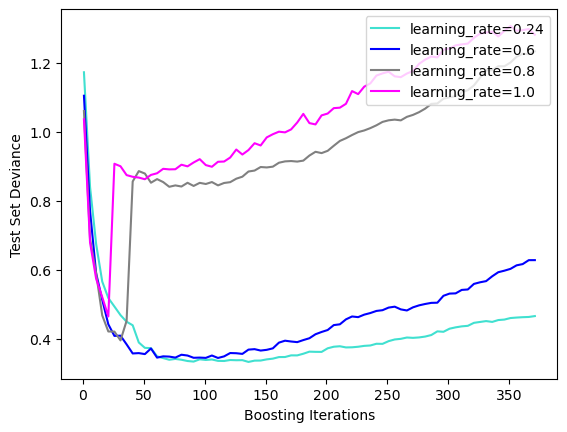

In [261]:
from sklearn import ensemble

original_params = {
    "n_estimators": 375,
    "random_state": 7,
    "min_samples_split": 5,
}

plt.figure()

for label, color, setting in [
    ("learning_rate=0.24", "turquoise", {"learning_rate": 0.4}),
    ("learning_rate=0.6", "blue", {"learning_rate": 0.6}),
    ("learning_rate=0.8","gray",{"learning_rate": 0.8},),
    ("learning_rate=1.0","magenta",{"learning_rate": 1.0},),
]:
    params = dict(original_params)
    params.update(setting)

    clf = ensemble.GradientBoostingClassifier(**params)
    clf.fit(X_train, y_train)

    # compute test set deviance
    test_deviance = np.zeros((params["n_estimators"],), dtype=np.float64)

    for i, y_proba in enumerate(clf.staged_predict_proba(X_test)):
        test_deviance[i] = 2 * log_loss(y_test, y_proba[:, 1])

    plt.plot(
        (np.arange(test_deviance.shape[0]) + 1)[::5],
        test_deviance[::5],
        "-",
        color=color,
        label=label,
    )

plt.legend(loc="upper right")
plt.xlabel("Boosting Iterations")
plt.ylabel("Test Set Deviance")

plt.show()

In [ ]:
-> learning_rate=0.52 최선!
Boosting iteration(부스팅 반복)은 부스팅(Boosting) 알고리즘에서 모델이 학습하는 각 단계
Test set deviance는 모델이 테스트 세트에서 얼마나 잘못 예측했는지를 측정하는 지표